# Coronary Heart Disease (CHD) Prediction with Logistic Regression
# Machine Learning Project
## Performed by Ryan Navarro, BSN, RN, CPAN, CCRN Alumnus

### Source:
[https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset)

The dataset is from a CHD study from individuals living in Framingham, Massachusetts. 

The study identifies risk factors that contribute to CVD, such as hypertension, cholesterol levels, diabetes, blood glucose levels, etc. 

The goal is to predict whether an individual is at risk of developing CHD within the next 10 years. 

For the column 'TenYearCHD':
- 1 means the individual is predicted to develop CHD within 10 years
- 0 means the individual is not predicted to develop CHD within 10 years

### Get the Data

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [5]:
CHD = pd.read_csv('framingham.csv')

```
---
Loads the dataset.
---
```

In [7]:
CHD.shape

(4240, 16)

```
---
Dataset contains:

4240 Rows
16 Columns
---
```

In [9]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


```
---
Null values noted. Column names shown. All columns have a numerical data type.

'TenYearCHD' (TARGET) with no null values noted.
---
```

In [11]:
CHD['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

```
---
Total value counts for the column 'TenYearCHD'.
---
```

In [13]:
CHD = CHD.fillna(CHD.median())

```
---
Null values imputed with median value (less sensitive to outliers) for each particular column.
---
```

In [15]:
CHD.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

```
---
No null values for each column after imputation with median value.
---
```

In [17]:
CHD.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


```
---
First 5 rows of the dataset.
---
```

In [19]:
CHD.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


```
---
Descriptive statistics of all numerical columns of the dataset.
---
```

In [21]:
CHD_target = CHD['TenYearCHD']

CHD_target

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

```
---
Column 'TenYearCHD' -> TARGET/LABEL
---
```

In [23]:
CHD_features = CHD.drop(columns=['TenYearCHD'])

```
---
All the other columns excluding `TenYearCHD` -> FEATURES/ATTRIBUTES (15 total)
---
```

In [25]:
CHD_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 497.0 KB


In [26]:
CHD_features = preprocessing.StandardScaler().fit(CHD_features).transform(CHD_features)

CHD_features

array([[ 1.15311332, -1.23428297,  2.00606854, ...,  0.28769301,
         0.34279225, -0.20128686],
       [-0.86721746, -0.41766419,  0.01990844, ...,  0.72009414,
         1.59045091, -0.2450359 ],
       [ 1.15311332, -0.18434454, -0.9731716 , ..., -0.11276941,
        -0.07309396, -0.50753015],
       ...,
       [-0.86721746,  0.28229477,  0.01990844, ..., -1.06356055,
         0.34279225,  1.11118437],
       [ 1.15311332, -1.11762315,  1.01298849, ..., -0.04889197,
        -0.73851192, -0.42003207],
       [-0.86721746, -1.23428297,  1.01298849, ..., -1.20114273,
         0.75867847, -0.07003974]])

```
---
'CHD_features' standardization with use of StandardScaler() and then use of .fit() and .transform().
---
```

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CHD_features, CHD_target, test_size=0.20, random_state=42)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (3392, 15) (3392,)
Test set: (848, 15) (848,)


```
---
Train-Test-Split (Split the dataset into 80% Train and 20% Test) and then shuffle using random_state.
---
```

### Explore the Data

In [45]:
num_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

num_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

```
---
'num_cols' -> all numerical columns of the dataset
---
```

In [47]:
corr_matrix = CHD[num_cols].corr()

corr_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017265,0.197026,0.314849,-0.051544,-0.004550,0.005853,0.015693,-0.069643,-0.035879,0.058199,0.081852,-0.116933,0.009970,0.088374
age,-0.029014,1.000000,-0.164016,-0.213662,-0.192017,0.121011,0.057679,0.306799,0.101314,0.260527,0.394053,0.205586,0.135470,-0.012868,0.117878,0.225408
education,0.017265,-0.164016,1.000000,0.018270,0.007856,-0.010445,-0.035178,-0.080780,-0.038204,-0.022851,-0.128139,-0.061326,-0.135744,-0.053658,-0.034090,-0.053570
currentSmoker,0.197026,-0.213662,0.018270,1.000000,0.760326,-0.048348,-0.032980,-0.103710,-0.044285,-0.046391,-0.130281,-0.107933,-0.167368,0.062661,-0.055082,0.019448
cigsPerDay,0.314849,-0.192017,0.007856,0.760326,1.000000,-0.044697,-0.032248,-0.065541,-0.036173,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792,0.058729
BPMeds,-0.051544,0.121011,-0.010445,-0.048348,-0.044697,1.000000,0.114614,0.258580,0.051407,0.078642,0.251479,0.192254,0.099617,0.015139,0.049142,0.086448
prevalentStroke,-0.004550,0.057679,-0.035178,-0.032980,-0.032248,0.114614,1.000000,0.074791,0.006955,0.000160,0.057000,0.045153,0.024283,-0.017672,0.018730,0.061823
prevalentHyp,0.005853,0.306799,-0.080780,-0.103710,-0.065541,0.258580,0.074791,1.000000,0.077752,0.162696,0.696656,0.615840,0.300537,0.146751,0.083406,0.177458
diabetes,0.015693,0.101314,-0.038204,-0.044285,-0.036173,0.051407,0.006955,0.077752,1.000000,0.040186,0.111265,0.050260,0.086058,0.048989,0.606495,0.097344
totChol,-0.069643,0.260527,-0.022851,-0.046391,-0.027134,0.078642,0.000160,0.162696,0.040186,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677,0.081749


```
---
CORRELATION MATRIX of numerical columns.

1 = Perfect Positive Correlation
0.7 to 1 = Strong Positive Correlation
0.4 to 0.7 = Moderate Positive Correlation
0 to 0.4 = Weak Positive Correlation

0 = No Correlation

-0.4 to 0 = Weak Negative Correlation
-0.7 to -0.4 = Moderate Negative Correlation
-1 to -0.7 = Strong Negative Correlation
-1 = Perfect Negative Correlation
---
```

In [49]:
corr_matrix['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.121319
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081749
BMI                0.074326
prevalentStroke    0.061823
cigsPerDay         0.058729
heartRate          0.022851
currentSmoker      0.019448
education         -0.053570
Name: TenYearCHD, dtype: float64

```
---
List (from highest to lowest) of Features/Attributes with highest correlation to Target/Label ('TenYearCHD').
---
```

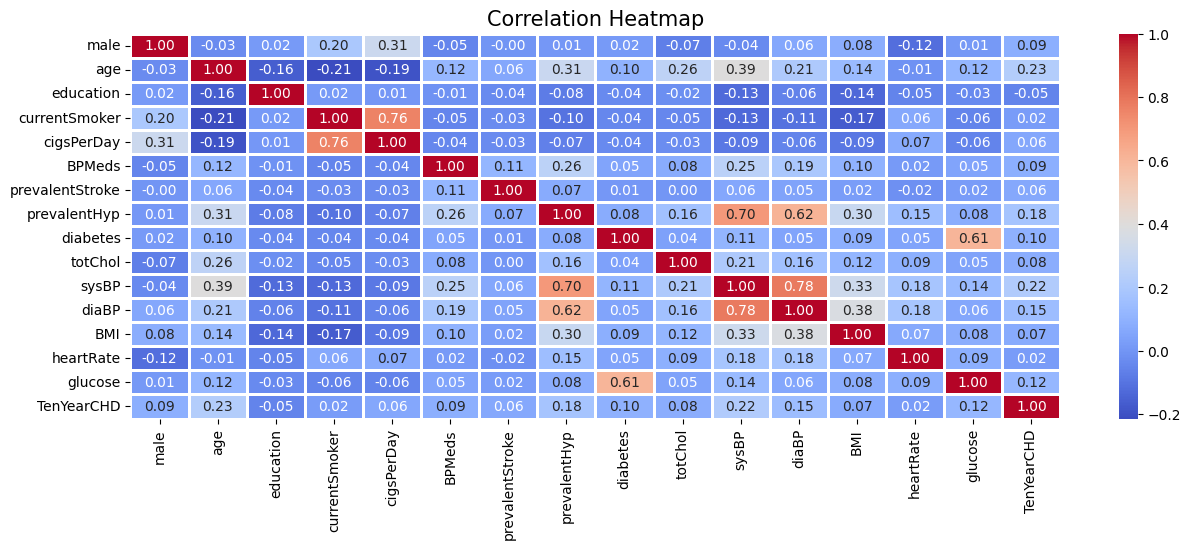

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

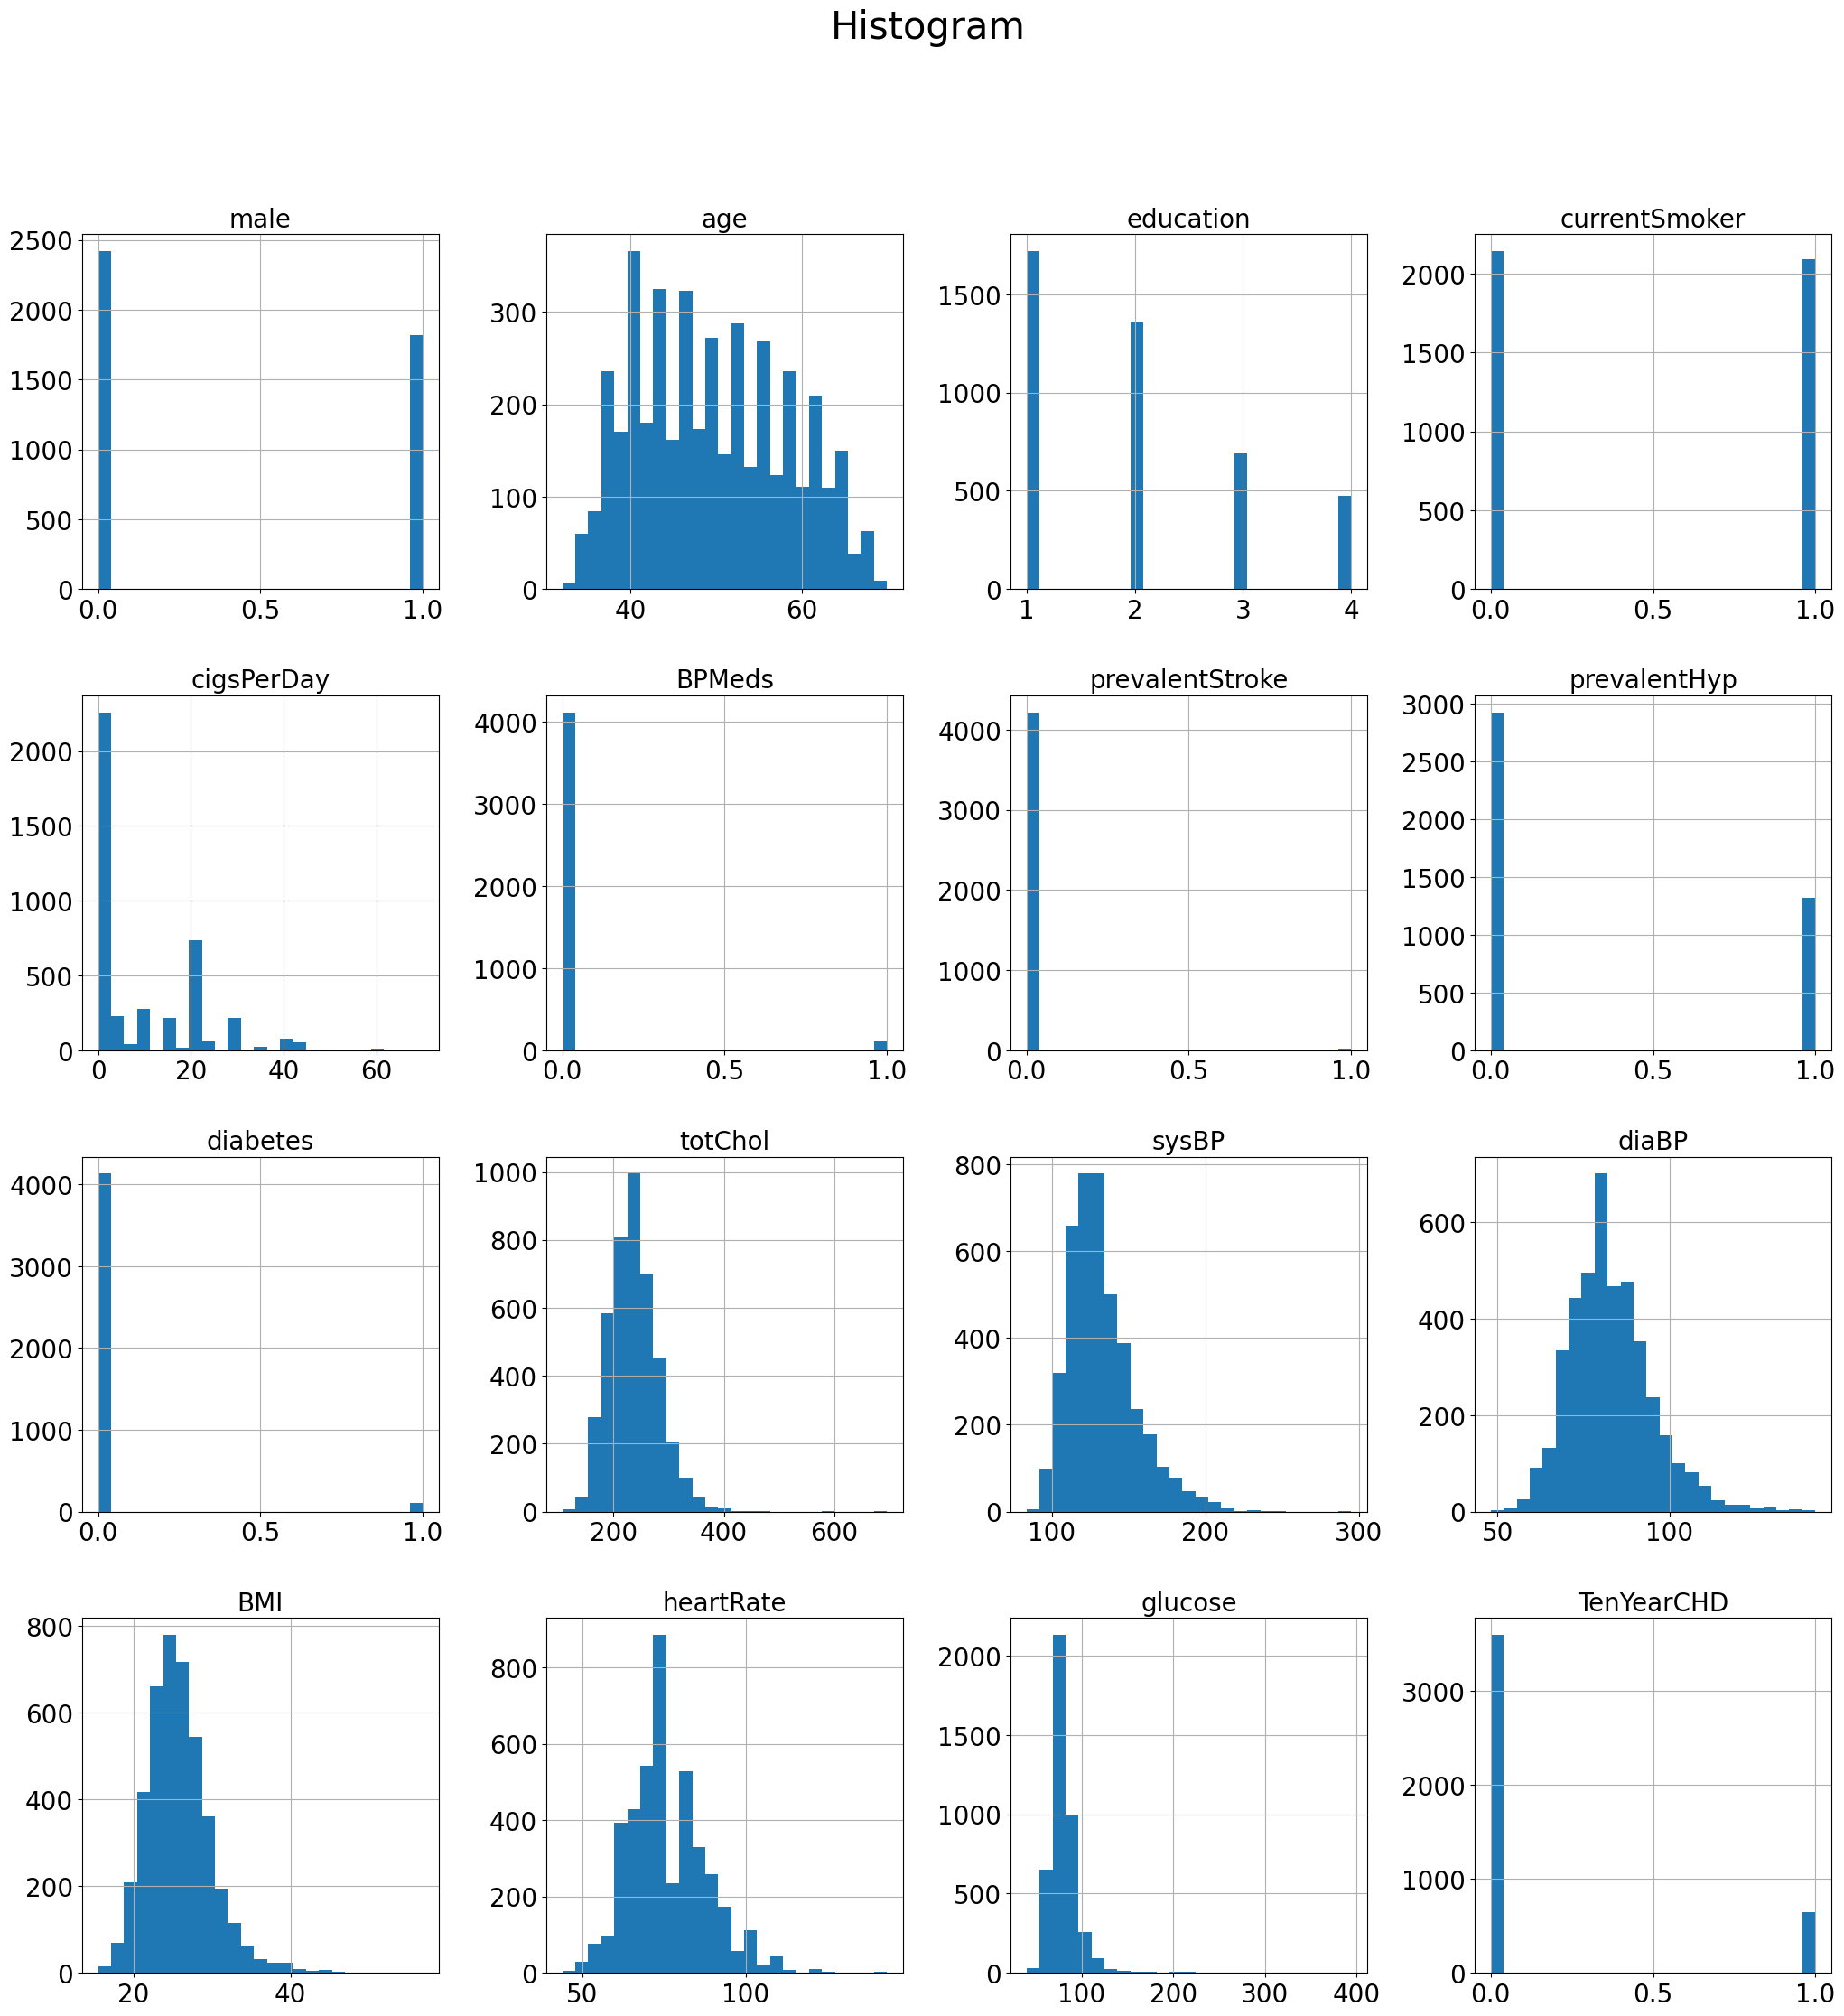

In [52]:
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=20)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

CHD.hist(bins=25, figsize=(25,25))
plt.suptitle('Histogram', fontsize=30)
plt.show()

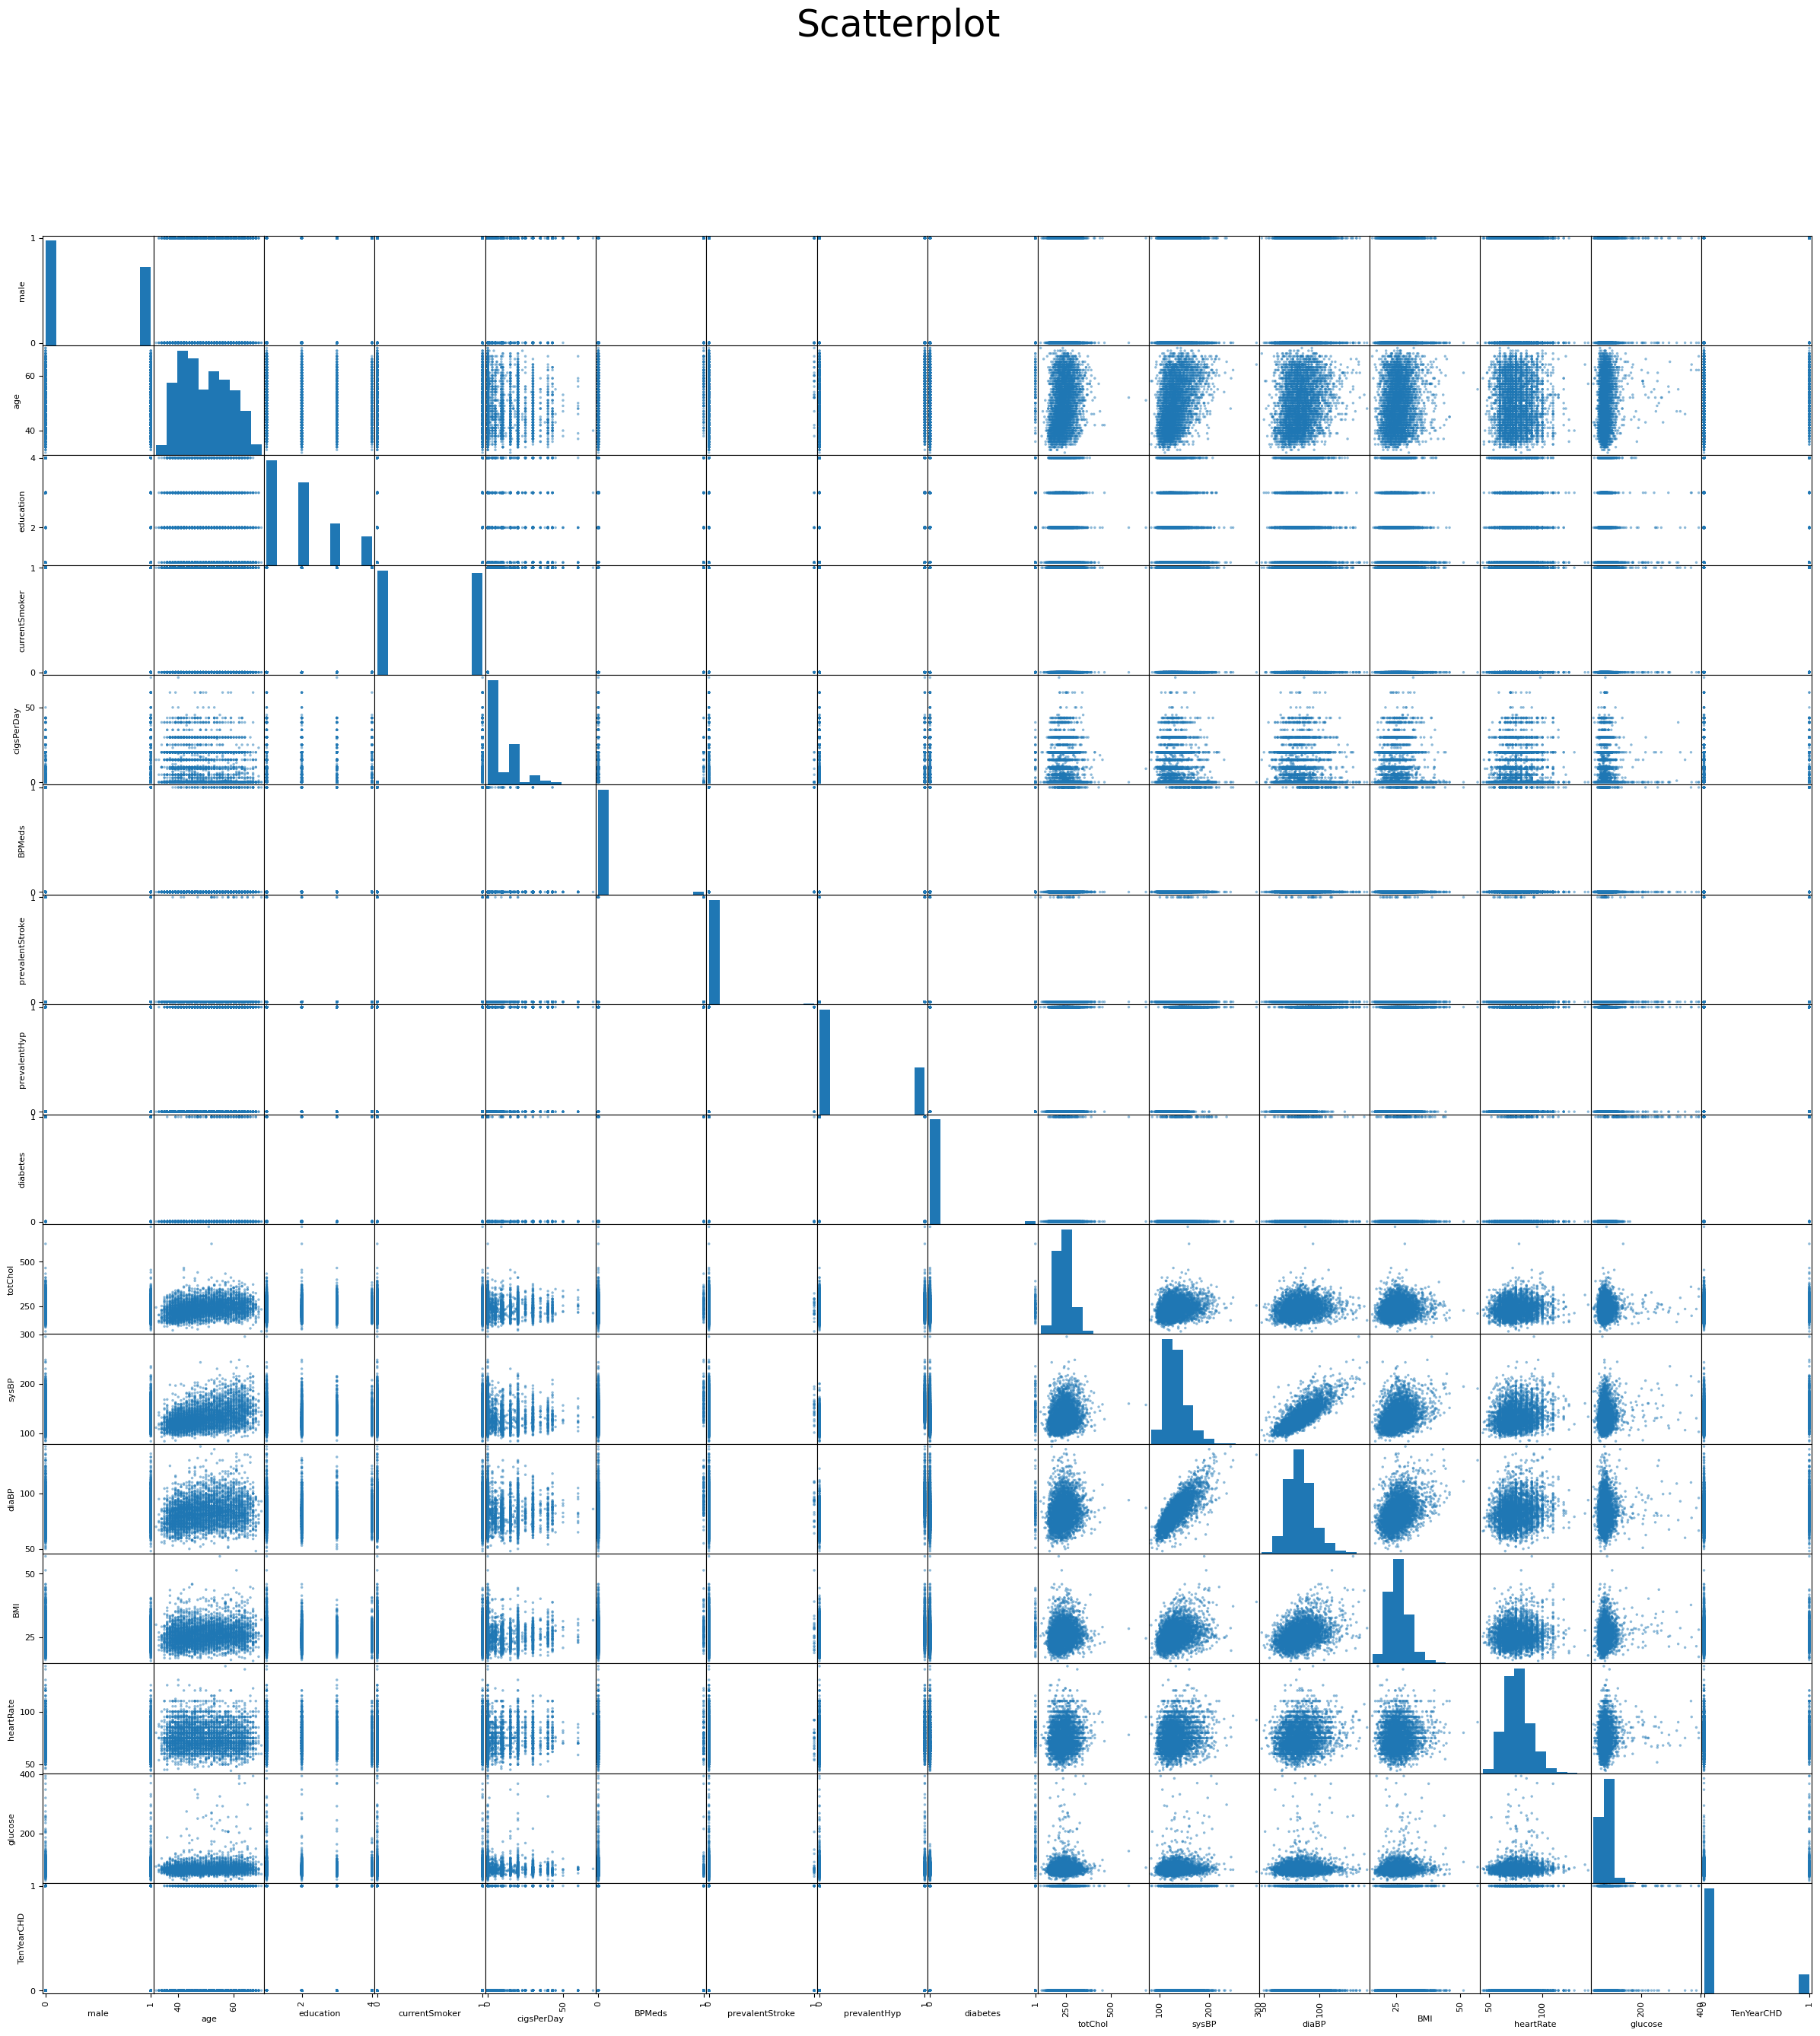

In [53]:
from pandas.plotting import scatter_matrix

scatter_matrix(CHD[num_cols], figsize=(30,30), s=25)
plt.suptitle('Scatterplot', fontsize=35)
plt.show()

### Prepare the Data

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg

LogisticRegression()

```
---
Instantiate class of Logistic Regression.
---
```

In [57]:
log_reg.fit(X_train, y_train)

LogisticRegression()

```
---
.fit() training data with Logistic Regression model.
---
```

In [72]:
y_pred = log_reg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

```
---
Prediction using trained Logistic Regression model 'log_reg' on the test data 'X_test' and store predicted class labels in 'y_pred'.
---
```

### Measure Performance on Test Set

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

print('Accuracy Score of the Linear Regression model is:', accuracy_score(y_test, y_pred))

Accuracy Score of the Linear Regression model is: 0.8549528301886793


In [96]:
from sklearn.model_selection import cross_val_score

cvs_log_reg = -cross_val_score(log_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=3)

initial_rmse_log_reg = np.mean(cvs_log_reg)

print('Initial RMSE of the Linear Regression model is:', initial_rmse_log_reg)

Initial RMSE of the Linear Regression model is: 0.3815647356111496


In [98]:
from sklearn.metrics import mean_squared_error

final_rmse_log_reg = mean_squared_error(y_test, y_pred, squared=False)

print('Final RMSE of the Linear Regression model is:', final_rmse_log_reg)

Final RMSE of the Linear Regression model is: 0.38085058725348025


/Users/rn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [102]:
from sklearn.metrics import r2_score

r2_score_log_reg = log_reg.score(X_test, y_test)

print ('R-squared of the Linear Regression model is:', r2_score_log_reg)

R-squared of the Linear Regression model is: 0.8549528301886793
